In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [2]:
df=pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.shape

(322, 20)

In [4]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [6]:
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [7]:
for cols in categorical_columns:
    dummies=pd.get_dummies(df[cols],drop_first=True)
    dummies=dummies.astype(int)
    print(dummies)
    df=pd.concat([df,dummies],axis=1)

     N
0    0
1    1
2    0
3    1
4    1
..  ..
317  1
318  0
319  0
320  0
321  0

[322 rows x 1 columns]
     W
0    0
1    1
2    1
3    0
4    0
..  ..
317  0
318  0
319  1
320  0
321  1

[322 rows x 1 columns]
     N
0    0
1    1
2    0
3    1
4    1
..  ..
317  1
318  0
319  0
320  0
321  0

[322 rows x 1 columns]


In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,N,W,N
0,293,66,1,30,29,14,1,293,66,1,...,A,E,446,33,20,535.925882,A,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,N,W,632,43,10,475.000000,N,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,...,A,W,880,82,14,480.000000,A,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,N,E,200,11,3,500.000000,N,1,0,1
4,321,87,10,39,42,30,2,396,101,12,...,N,E,805,40,4,91.500000,N,1,0,1


In [9]:
df=df.drop(df[categorical_columns],axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,N,W,N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,535.925882,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000,1,0,1


In [10]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df


In [11]:
X=df.drop(columns=['Salary']).values
y=df['Salary'].values

<Axes: ylabel='Errors'>

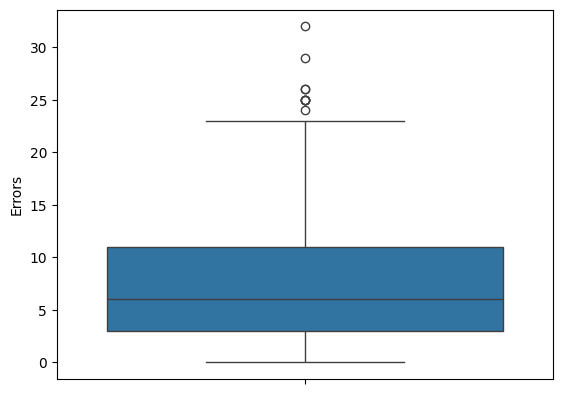

In [12]:
sns.boxplot(df['Errors'])

In [13]:
outliers(df,'CRuns')
outliers(df,'CHmRun')
outliers(df,'CRBI')
outliers(df,'CHits')
outliers(df,'CAtBat')
outliers(df,'CWalks')
outliers(df,'PutOuts')
outliers(df,'Assists')
# outliers(df,'Errors')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,N,W,N
0,293,66,1,30,29,14,1,293.0,66.0,1.0,30.0,29.0,14.00,446.000,33.0,20,535.925882,0,0,0
1,315,81,7,24,38,39,14,3449.0,835.0,69.0,321.0,414.0,375.00,632.000,43.0,10,475.000000,1,1,1
2,479,130,18,66,72,76,3,1624.0,457.0,63.0,224.0,266.0,263.00,648.625,82.0,14,480.000000,0,1,0
3,496,141,20,65,78,37,11,5628.0,1575.0,204.0,828.0,838.0,354.00,200.000,11.0,3,500.000000,1,0,1
4,321,87,10,39,42,30,2,396.0,101.0,12.0,48.0,46.0,33.00,648.625,40.0,4,91.500000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703.0,806.0,32.0,379.0,311.0,138.00,325.000,9.0,3,700.000000,1,0,1
318,492,136,5,76,50,94,12,5511.0,1511.0,39.0,897.0,451.0,747.25,313.000,381.0,20,875.000000,0,0,0
319,475,126,3,61,43,52,6,1700.0,433.0,7.0,217.0,93.0,146.00,37.000,113.0,7,385.000000,0,1,0
320,573,144,9,85,60,78,8,3198.0,857.0,97.0,470.0,420.0,332.00,648.625,131.0,12,960.000000,0,0,0


In [14]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [15]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y.reshape(-1,1))

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [18]:
acc=mean_squared_error(y_pred_linear,y_test)
acc

np.float64(0.6631003445081366)

In [19]:
ridge_reg = Ridge(alpha=0.5748)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [20]:
acc=mean_squared_error(y_pred_ridge,y_test)
acc

np.float64(0.6622057789127462)

In [27]:
lasso_reg = Lasso(alpha=0.121)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [28]:
acc=mean_squared_error(y_pred_lasso,y_test)
acc

np.float64(0.8755153525306111)